# Imaging of Si-Ge Crystal Sctructures using a Scanning Electron Microscope (SEM)

Santiago.R

In [75]:
import numpy as np
import scipy.constants as cs
import matplotlib.pyplot as plt
import pandas
from PIL import Image
data_path="/home/santi/Documents/Arbeits-Dokumente/Experimental Data/"

# De-Broglie Wavelength $\lambda _e$ for Electrons with different Acceleration Voltages $V_0$

The DeBroglie wavelength capable of describing the wave nature properties of mass-carrying particles is given by 
$\lambda _e = \frac{hc}{\sqrt{eV_0(2m_0c^2+eV_0)}}$ <br>
This relation can be evaluated repeatedly according to input voltage or electron wavelength by defining the following functions;

<ins> Functions <ins>

In [76]:
#Constants
h = cs.Planck
m_0 = cs.electron_mass
c = cs.speed_of_light
e = cs.elementary_charge
#Function returning the Electron wavelenght in pm at a given accelerating Voltage in kV
def electron_wavelength(V_0):
    V_0 = V_0*1000 #Conversion to volt
    debroglie_wavelength = h*c/(np.sqrt(e*V_0*(2*m_0*c**2+e*V_0)))
    debroglie_wavelength = debroglie_wavelength*10**12 #Conversion to picometers
    return debroglie_wavelength

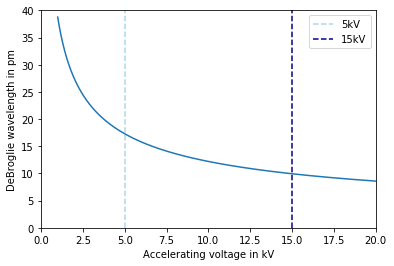

The wavelength becomes shorter for increased accelerating voltages, but converges towards zero at higher values with higher voltages reducing the wavelength less and less
The DeBroglie wavelength of the electrons accelerated in the SEM at energies of [ 5 15] keV is [17.30201     9.94103884] pm respectively


In [77]:
#Electron wavelength curve as a function of the accelerating Voltage between 1kV and 100kV
V_e = np.linspace(1,20,10000)
plt.plot(V_e,electron_wavelength(V_e))
plt.vlines(5, np.zeros(1),40, label='5kV', color='lightblue', linestyle='dashed')      #Plot characteristic X-Ray energies for Ge
plt.vlines(15, np.zeros(1),40, label='15kV', color='darkblue', linestyle='dashed')        #Plot characteristic X-Ray energies for Si
plt.xlabel('Accelerating voltage in kV')
plt.ylabel('DeBroglie wavelength in pm')
plt.legend()
startx, endx = 0, 20
starty, endy = 0, 40
plt.axis([startx, endx, starty, endy])
plt.show()
print('The wavelength becomes shorter for increased accelerating voltages, but converges towards zero at higher values with higher voltages reducing the wavelength less and less')
#Compute the electron wavelength for the 5kV and 15kV beam energies
V_sem = np.array([5,15])
print('The DeBroglie wavelength of the electrons accelerated in the SEM at energies of', V_sem , 'keV is' ,electron_wavelength(V_sem), 'pm respectively')

<ins> Accelerating Voltage Function <ins>

The energy of a mass-carrying particle at a given DeBroglie wavelength thus becomes:
$E = \sqrt{(\frac{hc}{\lambda})^2+m_0^2c^4}$

In [78]:
#Function returning the neccessary accelerating Voltage for a given Electron Wavelength
def accelerating_voltage(debroglie_wavelength):
    d = debroglie_wavelength
    V_0 = (np.sqrt((h*c/d)**2+m_0**2*c**4)-m_0*c**2)/e
    return V_0

In [79]:
electron_wavelength(1000) #Test for 1kV

0.8719186929043307

In [80]:
accelerating_voltage(3.8764034152582323e-11) #Test for 38.7pm wavelength

1000.0000000000866

For the experiment, accelerating voltages of 5kV and 15kV were used, which corresponds to

In [81]:
sem_voltages = np.array([15000,5000])
electron_wavelength(sem_voltages)

array([0.0799765 , 0.22594932])

<ins> Photon energies $E_{ph}$ at similar wavelengths $\lambda$ <ins>

In [82]:
#Function for the energy E of a photon of wavelength lambda in pm given in keV
def photon_energy(wavelength_pm):
    w = wavelength_pm*10**(-12)
    E = h*c/w
    E = E/(e*1000) #conversion to keV
    return E

In [83]:
photon_energy(electron_wavelength(V_sem))

array([ 71.65884105, 124.71955941])

<ins> Uncertainties <ins>

Assuming only an uncertainty for the accelerating voltage $V_0$, the gaußian error proprogation becomes
$u_{\lambda _e}= u_{V_0} \cdot \frac{hce(m_0c^2+eV_0)}{\sqrt{eV_0(2m_0c^2+eV_0)}}$ <br>
Which may then be automatically computed alongside the electron wavelength with

In [84]:
def electron_wavelength_err(V_0,u_V):
    debroglie_wavelength = h*c/(np.sqrt(e*V_0*(2*m_0*c**2+e*V_0)))
    err = u_V*h*c*e*(m_0*c**2+e*V_0)/(np.sqrt(e*V_0*(2*m_0*c**2+e*V_0)))
    return debroglie_wavelength, err

In [85]:
electron_wavelength_err(20000,100) #Test for 20kV and 100V uncertainty

(8.58851184477148e-12, 1.170664284336823e-41)

This uncertainty is comparatively low when compared to the computed value for the electrons wavelength

# Scanning Electron Microscope Data Processing

<ins> Image Evaluation <ins> 

The data from the SEM is saved as TIFF files. These files can be read using PIL as follows;

In [86]:
#Open TIFF with PIL.Image
im = Image.open('SEM/15kV_InLens_3mm.tif')
im.show()

In [87]:
#Convert TIFF to Numpy Array
imarray = np.array(im)
print(imarray)

[[125  24   0 ...  12   0  49]
 [  8  18  31 ...  54  24   0]
 [ 62   8  97 ...  17   0  22]
 ...
 [ 46 255 255 ... 255 255 247]
 [  0 255 255 ... 255 255 121]
 [ 59  26   0 ... 212 195 196]]


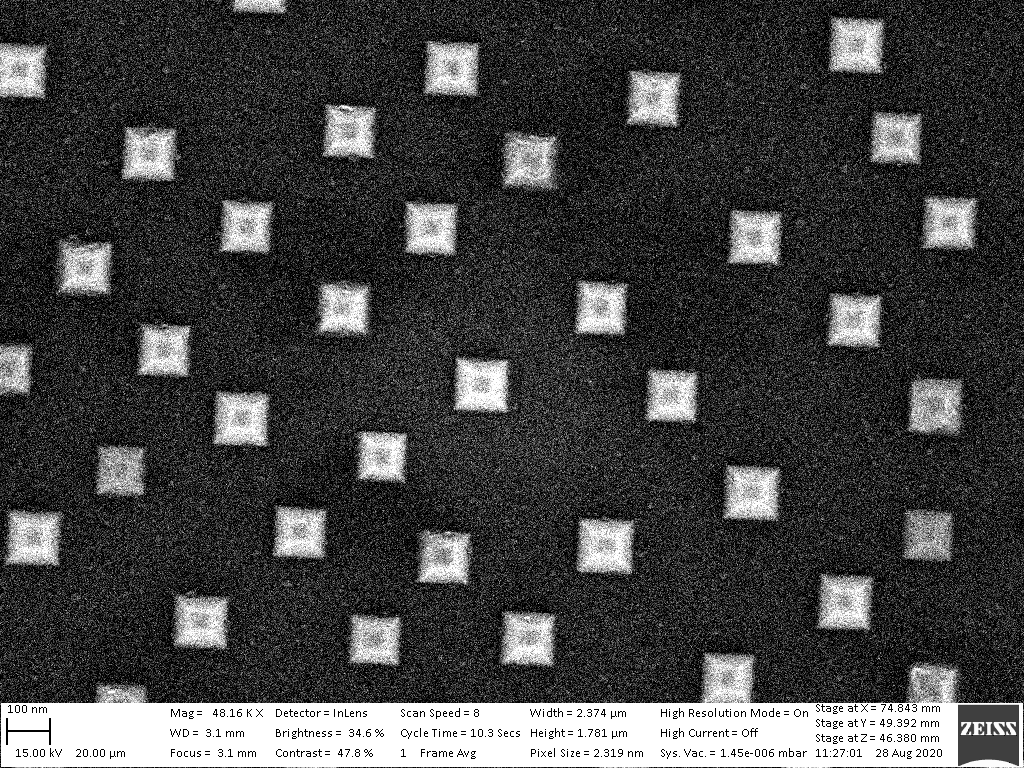

In [88]:
#Save Numpy Array as TIFF again
Image.fromarray(imarray)

# Characteristic X-Ray Spectroscopy

<ins> Functions and Constants <ins>

The characteristic X-Ray energies for Germanium (Ge) and Silicon (Si) are in KeV

In [89]:
ge_energies = np.array([9.886,10.982,1.188,1.218])    #in order from left to right; K-Alpha, K-Beta, L-Alpha, L-Beta transitions
si_energies = np.array([1.740,1.837,1.837-1.74])                 #in order from left to right; K-Alpha, K-Beta transitions

From $E=\frac{hc}{\lambda} \Leftrightarrow \lambda = \frac{hc}{E}$ it then follows for the X-Ray wavelengths that

In [90]:
def photon_wavelength(E):
    E_V = E*1000*e          #for E in keV
    lmbd = h*c/E_V
    return lmbd

Thus, for the characteristic Germanium (Ge) X-Ray wavelengths it holds true that

In [91]:
Ge_Wavelengths = photon_wavelength(ge_energies)*10**9 #in mm
print('The characteristic wavelengths for Germanium X-Ray emissions are', Ge_Wavelengths, 'nm')

The characteristic wavelengths for Germanium X-Ray emissions are [0.12541392 0.11289765 1.04363803 1.01793266] nm


and for Silicon (Si)

In [92]:
Si_Wavelengths = photon_wavelength(si_energies)*10**9 #in mm
print('The characteristic wavelengths for Silicon X-Ray emissions are', Si_Wavelengths, 'nm')

The characteristic wavelengths for Silicon X-Ray emissions are [ 0.71255286  0.67492759 12.78187613] nm


<ins> Spectra Evaluations <ins>

The data from the EDX detector measuring the X-Ray spectra is saved in xlsx files. These files can be read using Pandas as follows;

In [93]:
lower_energy_si_ge = pandas.read_excel('SEM/30um_5kV_SiGe.xlsx')                #Spectra of a SiGe crystal island at 5kV beam energy and 30um aperture
lower_energy_si = pandas.read_excel('SEM/30um_5kV_Si.xlsx')                     #Spectra of the Si basion at 5kV beam energy and 30um aperture
higher_energy_si_ge = pandas.read_excel('SEM/30um_15kV_SiGe.xlsx')              #Spectra of a SiGe crystal island at 15kV beam energy and 30um aperture
higher_energy_si = pandas.read_excel('SEM/30um_15kV_Si.xlsx')                   #Spectra of the Si basin at 15kV beam energy and 30um aperture
higher_energy_aperture_si_ge = pandas.read_excel('SEM/60um_15kV_SiGe_1.xlsx')   #Spectra of the SiGe crystal island at 15kV beam energy and 60um aperture
higher_energy_aperture_si = pandas.read_excel('SEM/60um_15kV_Si.xlsx')          #Spectra of the Si basin at 15kV beam energy and 60um aperture
#---------------------------------------------------------
sample_si = np.array([1000,1000])            #Sample Counts for the Si X-Ray energies
sample_ge = np.array([1000,1000,1000,1000])      #Sample Counts for the Ge X-Ray energies

Now, in order to read into the spectras, the xlsx files store the data starting from the 26th row, with the 1st column giving the measurement number, the 2nd the measured Energy, the 3rd the measured counts, and the 4th the counts/second 

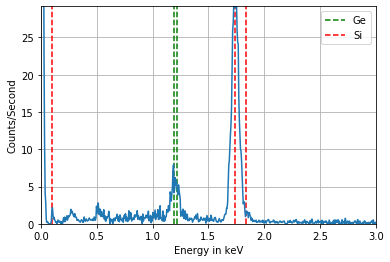

In [94]:
#Plot for the Spectra of a SiGe crystal island at 5kV beam energy and 30um aperture
low_si_ge_energy_readings = lower_energy_si_ge.values[25:,1]                   #Write Energy readings to a Numpy Array
low_si_ge_count_readings = lower_energy_si_ge.values[25:,3]                    #Write Count/Seconds readings to a Numpy Array
plt.plot(low_si_ge_energy_readings,low_si_ge_count_readings)                   #Plot the data
plt.vlines(ge_energies, np.zeros(4),sample_ge, label='Ge', color='green', linestyle='dashed')      #Plot characteristic X-Ray energies for Ge
plt.vlines(si_energies, np.zeros(2),sample_si, label='Si', color='red', linestyle='dashed')        #Plot characteristic X-Ray energies for Si
plt.xlabel('Energy in keV')
plt.ylabel('Counts/Second')
plt.legend()
plt.grid(True)
startx, endx = 0, 3
starty, endy = 0, low_si_ge_count_readings[444]
plt.axis([startx, endx, starty, endy])
plt.savefig('Plots/30um_5kV_SiGe.pdf')
plt.show()

The same evaluation can then be repeated efficiently for the other measurements by defining a function

In [95]:
def xspectra_evaluation(EDX_data, x_boundaries, y_boundaries, file_name):
    energy_readings = EDX_data.values[25:,1]                                        #Write Energy readings to a Numpy Array
    cps_readings = EDX_data.values[25:,3]                                           #Write Count/Seconds readings to a Numpy Array
    plt.plot(energy_readings,cps_readings)                                          #Plot the data
    plt.vlines(ge_energies, np.zeros(4),sample_ge, label='Ge', color='green', linestyle='dashed')       #Plot characteristic X-Ray energies for Ge
    plt.vlines(si_energies, np.zeros(2),sample_si, label='Si', color='red', linestyle='dashed')         #Plot characteristic X-Ray energies for Si
    plt.xlabel('Energy in keV')
    plt.ylabel('Counts/Second')
    plt.legend()
    plt.grid(True)
    startx, endx = x_boundaries
    starty, endy = y_boundaries
    plt.axis([startx, endx, starty, endy])
    plt.savefig('Plots/' + file_name + '.pdf')
    plt.show

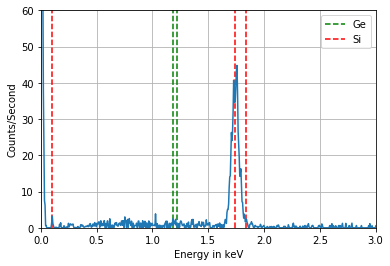

In [96]:
#Plot for the Spectra of the Si basin at 5kV beam energy and 30um aperture from 9-12 keV
x_boundary_5kV = np.array([0,3])
y_boundary_5kV = np.array([0,60])
xspectra_evaluation(lower_energy_si, x_boundary_5kV, y_boundary_5kV, '30um_5kV_Si')

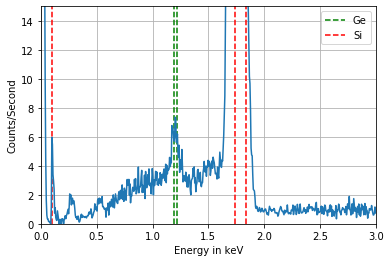

In [97]:
#Plot for the Spectra of a SiGe crystal island at 15kV beam energy and 30um aperture from 0-3 keV
x_boundary_15kV_1 = np.array([0,3])
y_boundary_15kV_1 = np.array([0,15])
xspectra_evaluation(higher_energy_si_ge, x_boundary_15kV_1, y_boundary_15kV_1, '30um_15kV_SiGe')

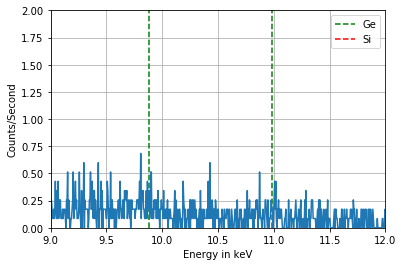

In [98]:
#Plot for the Spectra of a SiGe crystal island at 15kV beam energy and 30um aperture from 9-12 keV
x_boundary_15kV_2 = np.array([9,12])
y_boundary_15kV_2 = np.array([0,2])
xspectra_evaluation(higher_energy_si_ge, x_boundary_15kV_2, y_boundary_15kV_2, '30um_15kV_SiGe2')

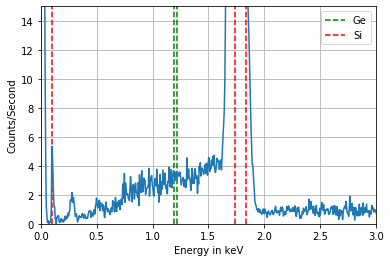

In [99]:
#Plot for the Spectra of the Si basin at 15kV beam energy and 30um aperture
xspectra_evaluation(higher_energy_si, x_boundary_15kV_1, y_boundary_15kV_1, '30um_15kV_Si')

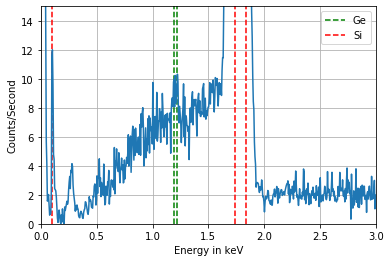

In [100]:
#Plot for the Spectra of the SiGe crystal island at 15kV beam energy and 60um aperture
xspectra_evaluation(higher_energy_aperture_si_ge, x_boundary_15kV_1, y_boundary_15kV_1, '60um_15kV_SiGe')

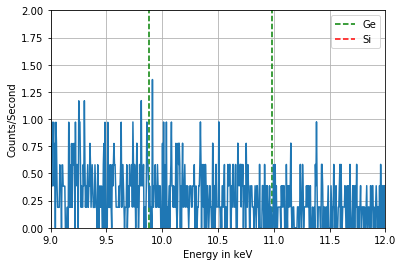

In [101]:
#Plot for the Spectra of the SiGe crystal island at 15kV beam energy and 60um aperture
xspectra_evaluation(higher_energy_aperture_si_ge, x_boundary_15kV_2, y_boundary_15kV_2, '60um_15kV_SiGe2')

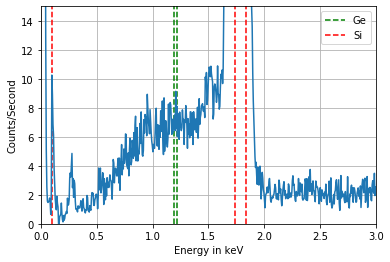

In [102]:
#Plot for the Spectra of the Si basin at 15kV beam energy and 60um aperture
xspectra_evaluation(higher_energy_aperture_si, x_boundary_15kV_1, y_boundary_15kV_1, '60um_15kV_Si')

<function matplotlib.pyplot.show(*args, **kw)>

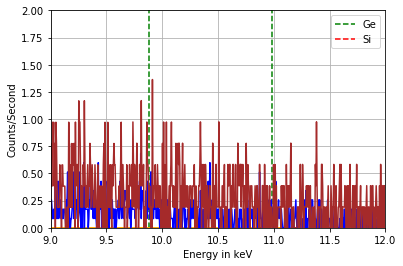

In [140]:
#Plot for all the Spectra of the SiGe crystal island between 8 and 12 keV
energy_readings = lower_energy_si_ge.values[25:,1]                                        #Write Energy readings to a Numpy Array
cps_readings = lower_energy_si_ge.values[25:,3]                                           #Write Count/Seconds readings to a Numpy Array
plt.plot(energy_readings,cps_readings, color='orange')                                                    #Plot the data
energy_readings = higher_energy_si_ge.values[25:,1]                                       #Write Energy readings to a Numpy Array
cps_readings = higher_energy_si_ge.values[25:,3]                                          #Write Count/Seconds readings to a Numpy Array
plt.plot(energy_readings,cps_readings, color='blue')                                                    #Plot the data
energy_readings = higher_energy_aperture_si_ge.values[25:,1]                              #Write Energy readings to a Numpy Array
cps_readings = higher_energy_aperture_si_ge.values[25:,3]                                 #Write Count/Seconds readings to a Numpy Array
plt.plot(energy_readings,cps_readings, color='brown')                                                    #Plot the data
plt.vlines(ge_energies, np.zeros(4),sample_ge, label='Ge', color='green', linestyle='dashed')       #Plot characteristic X-Ray energies for Ge
plt.vlines(si_energies, np.zeros(2),sample_si, label='Si', color='red', linestyle='dashed')         #Plot characteristic X-Ray energies for Si
plt.xlabel('Energy in keV')
plt.ylabel('Counts/Second')
plt.legend()
plt.grid(True)
startx, endx = x_boundary_15kV_2
starty, endy = y_boundary_15kV_2
plt.axis([startx, endx, starty, endy])
file_name = '15kV_SiGe2'
plt.savefig('Plots/' + file_name + '.pdf')
plt.show

<ins> Multiple Spectra Plots <ins>

In [118]:
def multispectra_evaluation(EDX_datasets, x_boundaries, y_boundaries, file_name):
    i = len(EDX_datasets)
    data_names = ['Si Substrate Spectra', 'SiGe Island Spectra']
    for i in range(0,i,1):
        EDX_data = EDX_datasets[i]
        data_name = data_names[i]
        energy_readings = EDX_data.values[25:,1]                                        #Write Energy readings to a Numpy Array
        cps_readings = EDX_data.values[25:,3]                                           #Write Count/Seconds readings to a Numpy Array
        plt.plot(energy_readings,cps_readings, label = data_name)                                          #Plot the data
    plt.vlines(ge_energies, np.zeros(4),sample_ge, label='Ge X-Ray Energy', color='green', linestyle='dashed')       #Plot characteristic X-Ray energies for Ge
    plt.vlines(si_energies, np.zeros(2),sample_si, label='Si X-Ray Energy', color='red', linestyle='dashed')         #Plot characteristic X-Ray energies for Si
    plt.xlabel('Energy in keV')
    plt.ylabel('Counts/Second')
    plt.legend(loc = 'upper right', prop={'size': 8})
    plt.grid(True)
    plt.title('X-Ray fluxes as function of their energies at ' + file_name)
    startx, endx = x_boundaries
    starty, endy = y_boundaries
    plt.axis([startx, endx, starty, endy])
    plt.savefig('Plots/' + file_name + '.pdf')
    plt.show

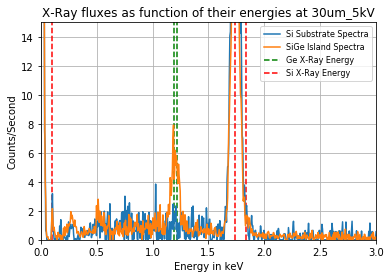

In [131]:
EDX_datasets_5kV = [lower_energy_si, lower_energy_si_ge]
x_boundary_5kV = np.array([0,3])
y_boundary_5kV = np.array([0,15])
multispectra_evaluation(EDX_datasets_5kV, x_boundary_5kV, y_boundary_5kV, '30um_5kV')

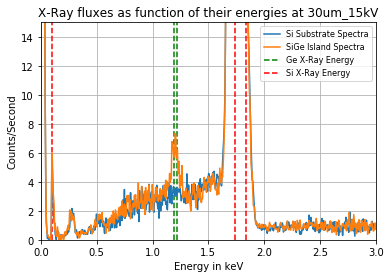

In [130]:
EDX_datasets_15kV = [higher_energy_si, higher_energy_si_ge]
x_boundary_15kV = np.array([0,3])
y_boundary_15kV = np.array([0,15])
multispectra_evaluation(EDX_datasets_15kV, x_boundary_15kV, y_boundary_15kV, '30um_15kV')

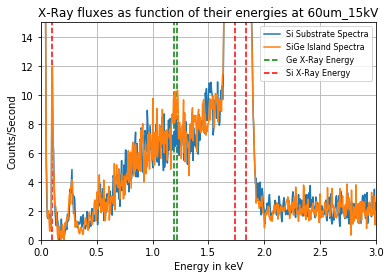

In [121]:
EDX_datasets_15kV_60um = [higher_energy_aperture_si, higher_energy_aperture_si_ge]
multispectra_evaluation(EDX_datasets_15kV_60um, x_boundary_15kV, y_boundary_15kV, '60um_15kV')